In [6]:
import os
import h5py
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
data_dir='ATL06/Byrd_glacier/'

I've downloaded the rel209 data available to date for a rectangle around Byrd Glacier to a directory on the jupyter hub.  
The workflow was:
1. clone the smithB/ICESat2 repo

\>> git clone https://github.com/smithb/icesat2
2. setup my token:

\>> bash icesat2/python/setup_token ben_smith notmypassword 34.222.204.170

Here ben_smith is my Earthdata username, notmypassword is not my password (I used my real password, thank you very much) , and 34.222.204.170 is the IP for the terminal instance 
3. use the run_ATL06_query script to generate a query for a box around Byrd:

\>> python3 icesat2/python/run_ATL06_query.py -b 148 -81 162 -80 -s -v 209

This takes maybe 5 minutes to execute, and spits out a bunch of subsetted ATL06 files.



Here's a quick look at what's there:

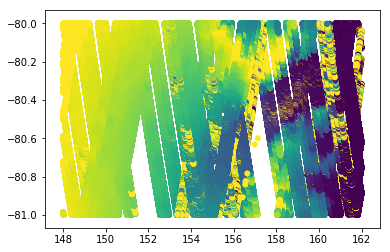

In [16]:
data_dir='ATL06/Byrd_glacier/'
D6=[]
pairs=[1, 2, 3]
beams=['l','r']
datasets=['latitude','longitude','h_li']
for file in glob(data_dir+'/*.h5'):
    #print(file)
    this_name=os.path.basename(file)
    with h5py.File(file) as h5f:
        for pair in pairs:
            for beam in beams:
                temp={}
                for dataset in datasets:
                    DS='/gt%d%s/land_ice_segments/%s' % (pair, beam, dataset)
                    #print(DS)
                    try:
                        temp[dataset]=np.array(h5f[DS])
                    except KeyError:
                        pass
                if len(temp) > 0:
                    D6.append(temp)

plt.figure();
for Di in D6:
    plt.scatter(Di['longitude'], Di['latitude'], c=Di['h_li'], vmin=0, vmax=2000, linewidth=0)
    

I'd imagine the next step will be to pick a few tracks that have mixed data quality, and demonstrate how to separate the good from the bad.